# Import Cleaned Data & Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [2]:
#See part 4 for scrubbing process

df  = pd.read_csv('cleaned_df_zipcodes')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,65,2020
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,69,29
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,87,2020
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,55,2020
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,33,2020


# Bucketing data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21188 entries, 0 to 21187
Data columns (total 20 columns):
price             21188 non-null float64
bedrooms          21188 non-null int64
bathrooms         21188 non-null float64
sqft_living       21188 non-null int64
sqft_lot          21188 non-null int64
floors            21188 non-null float64
waterfront        21188 non-null float64
view              21188 non-null float64
condition         21188 non-null int64
grade             21188 non-null int64
sqft_above        21188 non-null int64
sqft_basement     21188 non-null int64
zipcode           21188 non-null int64
lat               21188 non-null float64
long              21188 non-null float64
sqft_living15     21188 non-null int64
sqft_lot15        21188 non-null int64
yr_sold           21188 non-null int64
home_age          21188 non-null int64
yrs_since_reno    21188 non-null int64
dtypes: float64(7), int64(13)
memory usage: 3.2 MB


In [4]:
#Adding a new column to replace the sqft_basement
#sqft_basement data is very skewed since any house w/o a basement was assigned 0 
#(see part 2)

df.loc[df['sqft_basement'] == 0, 'has_basement'] = 0
df.loc[df['sqft_basement'] != 0, 'has_basement'] = 1

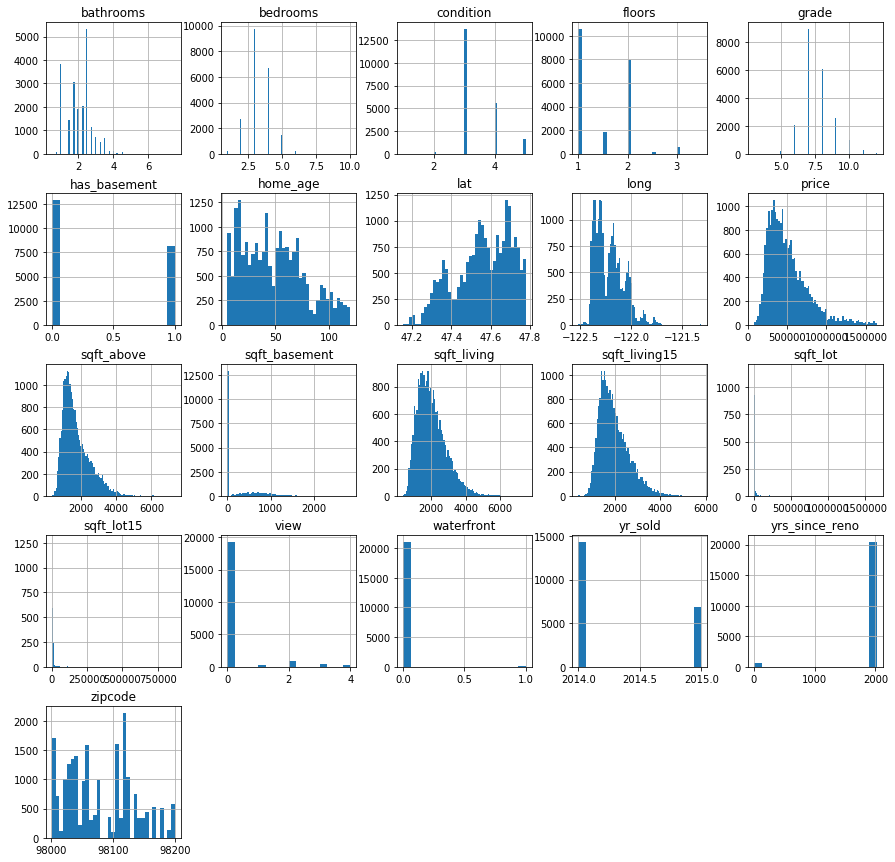

In [5]:
df.hist(bins = 'auto', figsize = (15,15));

In [6]:
#splitting continous and categorical variables
#Dropping sqft_basement

#Categorical df 

df_cat = df[['yrs_since_reno','waterfront','view','condition','grade','has_basement',
            'yr_sold','zipcode']].copy()

#Numerical df

df_num = df[['bathrooms','bedrooms','floors','home_age','price','sqft_above','sqft_living','sqft_living15',
            'sqft_lot','sqft_lot15']].copy()


# Removing outliers in df_num

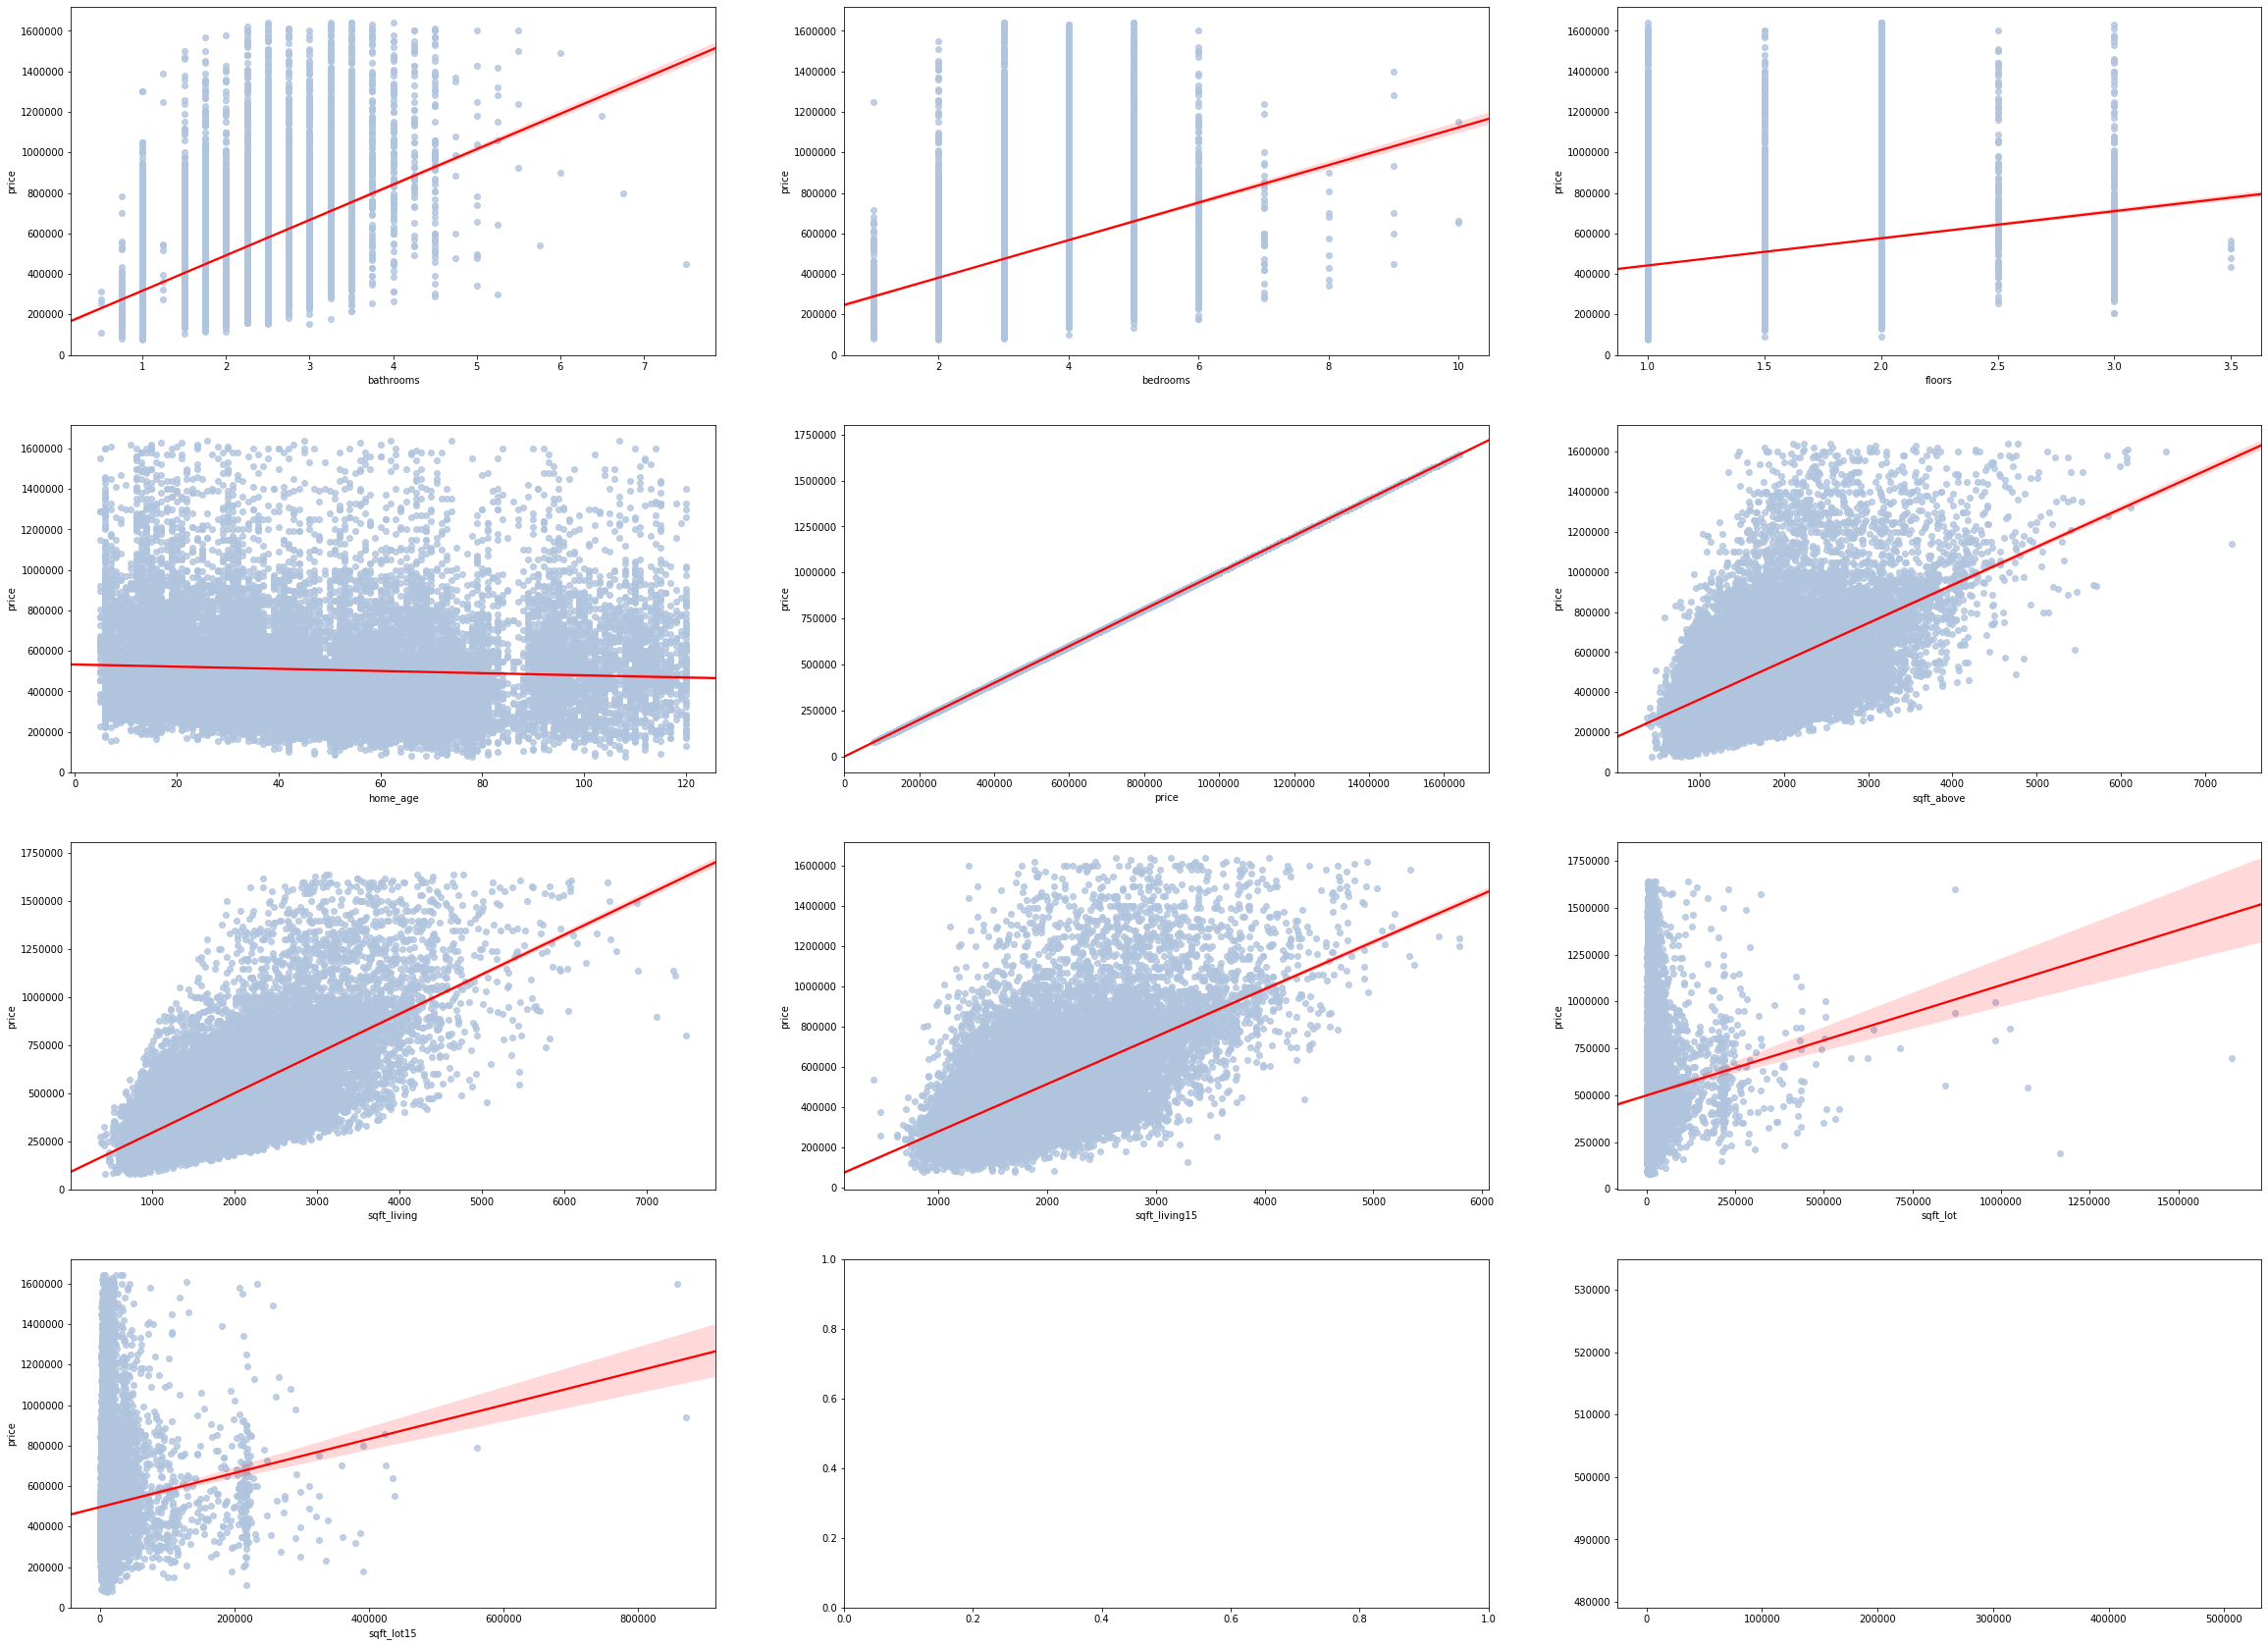

In [7]:
fig, axes = plt.subplots(4, 3,figsize=(40,30))
axes = axes.flatten()
for i, (feature, ax) in enumerate(zip(df_num, axes), 1):
    sns.regplot(data=df_num, x=feature, y='price', ax=ax,scatter_kws = {'color': 'lightsteelblue'}
                ,line_kws = {'color': 'red'})

In [8]:
#sqft_lot appears to have many outliers
#Otherwise, it is difficult to tell
#Going to leverage z-score

In [9]:
df_no_outliers = df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]
df_no_outliers

,bathrooms,bedrooms,floors,home_age,price,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15
0,1.00,3,1.0,65,221900.0,1180,1180,1340,5650,5650
1,2.25,3,2.0,69,538000.0,2170,2570,1690,7242,7639
2,1.00,2,1.0,87,180000.0,770,770,2720,10000,8062
3,3.00,4,1.0,55,604000.0,1050,1960,1360,5000,5000
4,2.00,3,1.0,33,510000.0,1680,1680,1800,8080,7503
...,...,...,...,...,...,...,...,...,...,...
21183,2.50,3,3.0,11,360000.0,1530,1530,1530,1131,1509
21184,2.50,4,2.0,6,400000.0,2310,2310,1830,5813,7200
21185,0.75,2,2.0,11,402101.0,1020,1020,1020,1350,2007
21186,2.50,3,2.0,16,400000.0,1600,1600,1410,2388,1287


In [10]:
#Repeating regplots

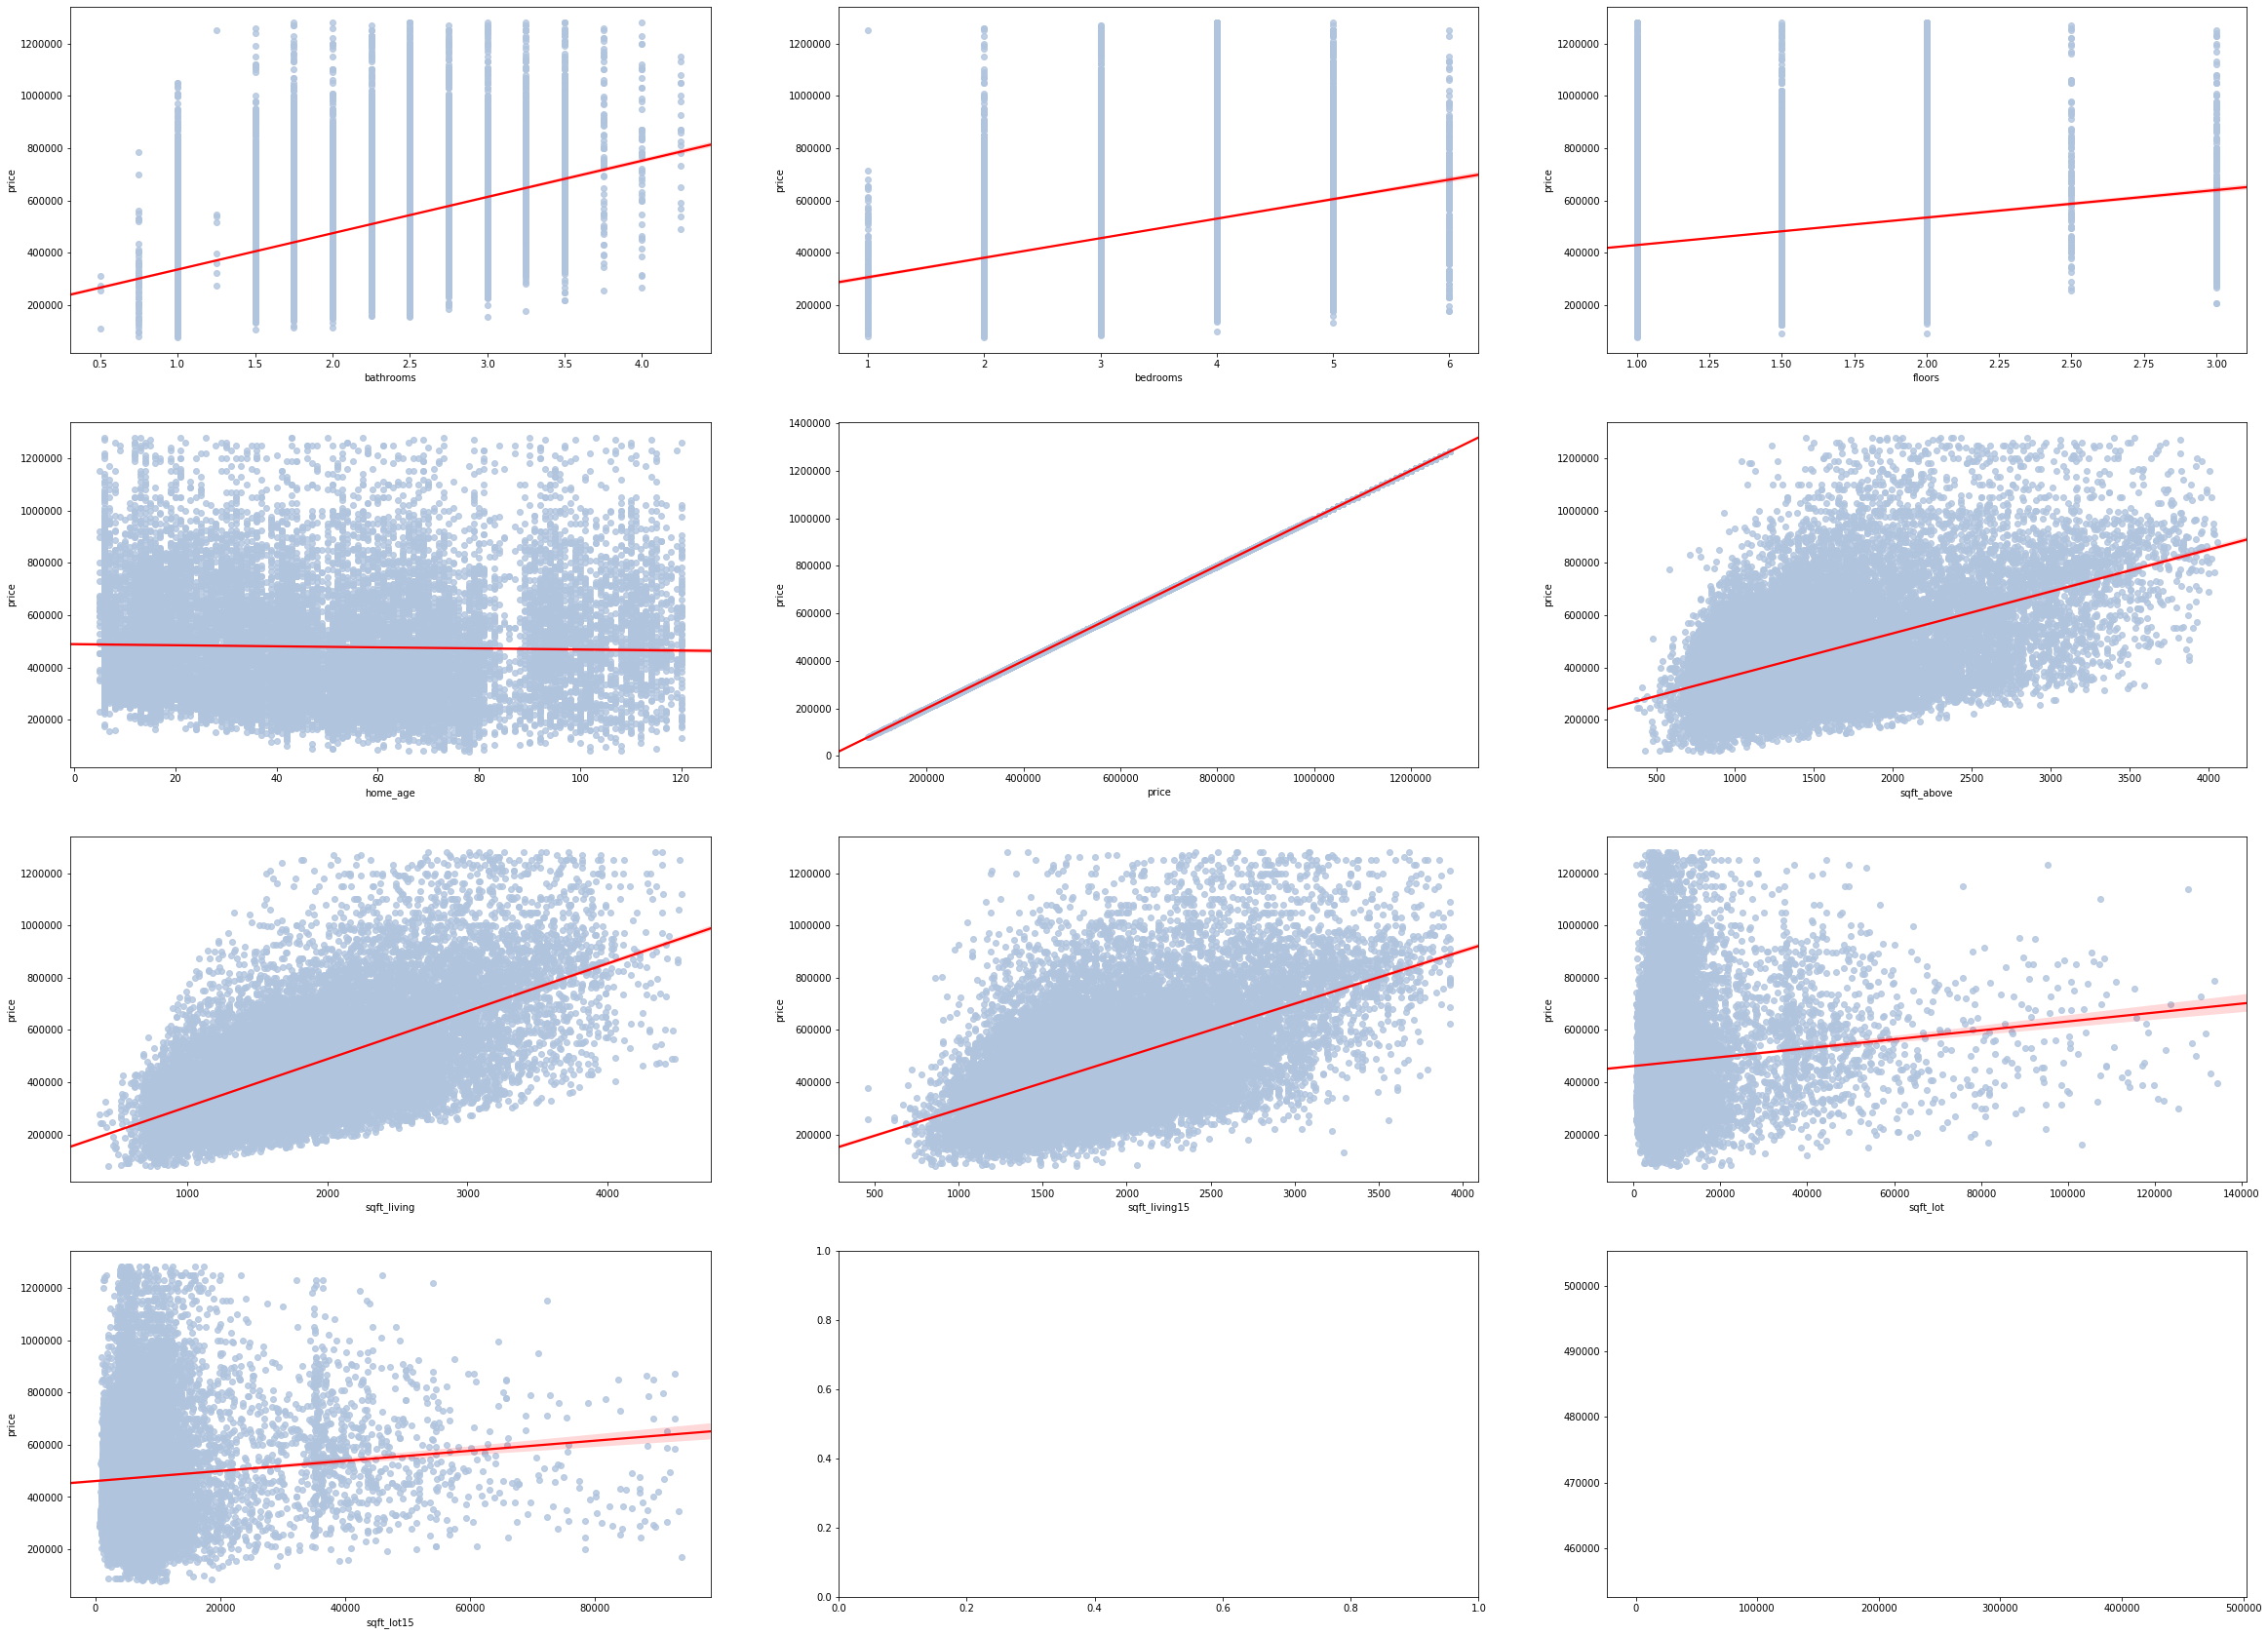

In [11]:
fig, axes = plt.subplots(4, 3,figsize=(40,30))
axes = axes.flatten()
for i, (feature, ax) in enumerate(zip(df_no_outliers, axes), 1):
    sns.regplot(data=df_no_outliers, x=feature, y='price', ax=ax,scatter_kws = {'color': 'lightsteelblue'}
                ,line_kws = {'color': 'red'})

In [12]:
#Plots appear more normal

In [13]:
#Performing simple linear regression for each variable 
#Determining which are most correlated with price

In [14]:
linreg = LinearRegression() 

for col in df_no_outliers.columns:
    
    x = df_no_outliers[col].values.reshape(-1, 1) 
    y = df_no_outliers['price'].values.reshape(-1, 1) 
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    print(col,"v. price")
    print('r-squared:', round(r_sq,2))
    print("")

bathrooms v. price
r-squared: 0.19

bedrooms v. price
r-squared: 0.09

floors v. price
r-squared: 0.07

home_age v. price
r-squared: 0.0

price v. price
r-squared: 1.0

sqft_above v. price
r-squared: 0.25

sqft_living v. price
r-squared: 0.37

sqft_living15 v. price
r-squared: 0.3

sqft_lot v. price
r-squared: 0.01

sqft_lot15 v. price
r-squared: 0.01



In [15]:
#sqft_living, sqft_living15, sqft_above and bathrooms are most highly correlated w/price

In [16]:
#Saving df with outliers removed

df_no_outliers = df[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]
df_no_outliers.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,65,2020,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400,98125,47.7210,-122.319,1690,7639,2014,69,29,1.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,87,2020,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910,98136,47.5208,-122.393,1360,5000,2014,55,2020,1.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,33,2020,0.0


# Creating dummy variables

In [17]:
df_no_outliers.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,65,2020,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400,98125,47.7210,-122.319,1690,7639,2014,69,29,1.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,87,2020,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910,98136,47.5208,-122.393,1360,5000,2014,55,2020,1.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,33,2020,0.0


In [18]:
df_clean = df_no_outliers.copy()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21188 entries, 0 to 21187
Data columns (total 8 columns):
yrs_since_reno    21188 non-null int64
waterfront        21188 non-null float64
view              21188 non-null float64
condition         21188 non-null int64
grade             21188 non-null int64
has_basement      21188 non-null float64
yr_sold           21188 non-null int64
zipcode           21188 non-null int64
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [19]:
#converting category columns to objects 

for column in list(df_cat.columns)[1:]:
    df_clean[column] = df_clean[column].astype(str)
    
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19942 entries, 0 to 21187
Data columns (total 21 columns):
price             19942 non-null float64
bedrooms          19942 non-null int64
bathrooms         19942 non-null float64
sqft_living       19942 non-null int64
sqft_lot          19942 non-null int64
floors            19942 non-null float64
waterfront        19942 non-null object
view              19942 non-null object
condition         19942 non-null object
grade             19942 non-null object
sqft_above        19942 non-null int64
sqft_basement     19942 non-null int64
zipcode           19942 non-null object
lat               19942 non-null float64
long              19942 non-null float64
sqft_living15     19942 non-null int64
sqft_lot15        19942 non-null int64
yr_sold           19942 non-null object
home_age          19942 non-null int64
yrs_since_reno    19942 non-null int64
has_basement      19942 non-null object
dtypes: float64(5), int64(9), object(7)
memory usage: 3

In [20]:
df_clean = pd.get_dummies(df_clean,drop_first=True)

In [21]:
#checking column names

df_clean.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'lat', 'long',
       ...
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199',
       'yr_sold_2015', 'has_basement_1.0'],
      dtype='object', length=102)

In [22]:
#removing spaces from column names

df_clean.columns = df_clean.columns.str.replace(' ', '_')

In [23]:
#removing periods from column names

df_clean.columns = df_clean.columns.str.replace('.', '_')

In [24]:
df_clean.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'lat', 'long',
       ...
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199',
       'yr_sold_2015', 'has_basement_1_0'],
      dtype='object', length=102)

# Train-Test Split


In [25]:
# Import
from sklearn.model_selection import train_test_split

In [26]:
# Defining the problem
y = df_clean.price
X = df_clean.drop('price',axis=1)

In [27]:
#split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Merging for modeling

train_df = X_train.copy()
train_df['price'] = y_train
train_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,yr_sold_2015,has_basement_1_0,price
15489,4,2.5,2150,5397,2.0,2150,0,47.4644,-122.151,2260,...,0,0,0,0,0,0,0,0,0,400000.0
20615,3,2.5,1509,1114,3.0,1509,0,47.7049,-122.340,1509,...,0,0,0,0,0,0,0,1,0,420000.0
2128,2,1.0,1088,8453,1.0,1088,0,47.2685,-122.231,1088,...,0,0,0,0,0,0,0,1,0,238000.0
12438,3,2.5,1740,6992,2.0,1740,0,47.3574,-122.158,1260,...,0,0,0,0,0,0,0,0,0,261500.0
6282,3,1.0,1250,8314,1.0,1250,0,47.4522,-122.178,1188,...,0,0,0,0,0,0,0,1,0,144000.0


# Baseline Model


In [29]:
outcome = 'price'
x_cols = list(X_train.columns)

In [30]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

In [31]:
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     840.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:13:06   Log-Likelihood:            -2.0407e+05
No. Observations:               15953   AIC:                         4.083e+05
Df Residuals:                   15852   BIC:                         4.091e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.338e+07   4.06e+06     -3.299      0.001   -2.13e+07   -5.43e+06
bedrooms         -2094.7085   1094.244     -1.914      0.056   -4239.550      50.133
bathrooms         1.853e+04   1780.393     10.409      0.000     1.5e+04     2.2e+04
sqft_living         60.3124      1.531     39.403      0.000      57.312      63.313
sqft_lot             1.0563      0.104     10.133      0.000       0.852       1.261
floors           -1.706e+04   2077.768     -8.211      0.000   -2.11e+04    -1.3e+04
sqft_above          55.1740      1.796     30.718      0.000      51.653      58.695
sqft_basement        5.1383      2.403      2.138      0.033       0.428       9.849
lat               7.353e+04   4.18e+04      1.759      0.079   -8430.517    1.55e+05
long             -8.146e+04   2.99e+04     -2.721      0.007    -1.4e+05   -2.28e+04
sqft_living15       29.2773      2.087     14.030      0.000      25.187      33.368
sqft_lot15          -0.6540      0.139     -4.705      0.000      -0.926      -0.382
home_age           433.4800     42.152     10.284      0.000     350.857     516.103
yrs_since_reno     -18.6973      2.114     -8.846      0.000     -22.840     -14.555
waterfront_1_0    1.913e+05   1.57e+04     12.186      0.000    1.61e+05    2.22e+05
view_1_0          6.669e+04   5971.605     11.168      0.000     5.5e+04    7.84e+04
view_2_0          5.802e+04   3724.720     15.578      0.000    5.07e+04    6.53e+04
view_3_0              1e+05   5525.997     18.098      0.000    8.92e+04    1.11e+05
view_4_0          1.996e+05   9049.585     22.060      0.000    1.82e+05    2.17e+05
condition_2       7.379e+04   2.04e+04      3.613      0.000    3.38e+04    1.14e+05
condition_3       1.019e+05   1.89e+04      5.401      0.000    6.49e+04    1.39e+05
condition_4       1.239e+05   1.89e+04      6.564      0.000    8.69e+04    1.61e+05
condition_5       1.603e+05    1.9e+04      8.439      0.000    1.23e+05    1.97e+05
grade_11          7.569e+04   1.08e+04      7.032      0.000    5.46e+04    9.68e+04
grade_3          -8.029e+04   8.78e+04     -0.915      0.360   -2.52e+05    9.18e+04
grade_4          -1.907e+05   1.97e+04     -9.691      0.000   -2.29e+05   -1.52e+05
grade_5          -2.024e+05   8748.225    -23.131      0.000    -2.2e+05   -1.85e+05
grade_6          -1.974e+05   5849.240    -33.745      0.000   -2.09e+05   -1.86e+05
grade_7          -1.743e+05   4947.145    -35.237      0.000   -1.84e+05   -1.65e+05
grade_8          -1.348e+05   4474.741    -30.121      0.000   -1.44e+05   -1.26e+05
grade_9          -5.992e+04   4377.349    -13.689      0.000   -6.85e+04   -5.13e+04
zipcode_98002     9514.7253   9042.722      1.052      0.293   -8210.038    2.72e+04
zipcode_98003    -5107.0320   7933.422     -0.644      0.520   -2.07e+04    1.04e+04
zipcode_98004     5.128

In [32]:
linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [34]:
train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squarred Error:', train_mse) 
print('Test Mean Squarred Error:', test_mse)
test_mse-train_mse #large difference in RMSEs

Train Mean Squarred Error: 7558515277.672846
Test Mean Squarred Error: 7640651752.450417


82136474.77757072

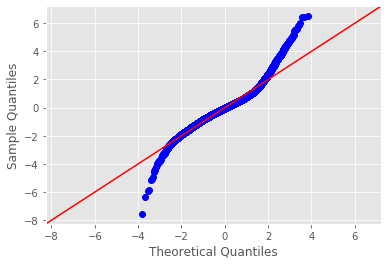

In [35]:
#Skewed distribution of residuals

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

In [36]:
#Baseline model shows a strong R2 of 0.841
#However, the residuals do not show a normal distribution
#Furthermore, multiple variables with a p-value greater than 0.05

print(("number of features w/p-value > 0.05: ") + str(len(model.pvalues[1:][model.pvalues>0.05])))
print(("total number of features: ") + str(len(x_cols)))

number of features w/p-value > 0.05: 12
total number of features: 101


# Transforming price

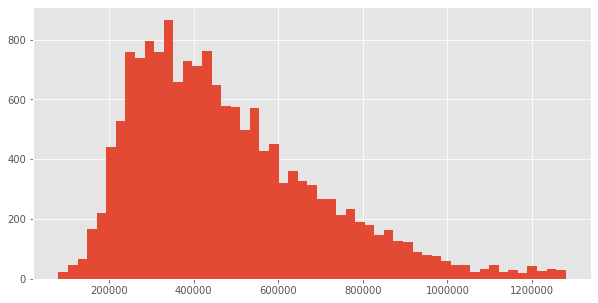

In [37]:
train_df.price.hist(bins = 'auto', figsize = (10,5));

In [38]:
#price is skewed to the left

In [39]:
log_price_df = train_df.copy()

In [40]:
#log transformation of price

log_price_df['price'] = log_price_df['price'].map(lambda x: np.log(x))

In [42]:
outcome = 'price'
x_cols = list(log_price_df.columns)
x_cols.remove('price')

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = ols(formula=formula, data=log_price_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     941.4
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:28:27   Log-Likelihood:                 5429.2
No. Observations:               15953   AIC:                        -1.066e+04
Df Residuals:                   15852   BIC:                            -9881.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -53.9326      8.032     -6.715      0.000     -69.676     -38.190
bedrooms            -0.0023      0.002     -1.056      0.291      -0.007       0.002
bathrooms            0.0444      0.004     12.593      0.000       0.037       0.051
sqft_living          0.0001   3.03e-06     36.518      0.000       0.000       0.000
sqft_lot           2.53e-06   2.06e-07     12.257      0.000    2.13e-06    2.93e-06
floors              -0.0315      0.004     -7.655      0.000      -0.040      -0.023
sqft_above           0.0001   3.56e-06     33.881      0.000       0.000       0.000
sqft_basement     -9.82e-06   4.76e-06     -2.063      0.039   -1.91e-05   -4.91e-07
lat                  0.4556      0.083      5.502      0.000       0.293       0.618
long                -0.3607      0.059     -6.084      0.000      -0.477      -0.244
sqft_living15     8.196e-05   4.13e-06     19.834      0.000    7.39e-05    9.01e-05
sqft_lot15       -1.001e-06   2.75e-07     -3.635      0.000   -1.54e-06   -4.61e-07
home_age             0.0007   8.35e-05      8.959      0.000       0.001       0.001
yrs_since_reno   -2.765e-05   4.19e-06     -6.606      0.000   -3.59e-05   -1.94e-05
waterfront_1_0       0.4287      0.031     13.788      0.000       0.368       0.490
view_1_0             0.1043      0.012      8.818      0.000       0.081       0.127
view_2_0             0.0954      0.007     12.936      0.000       0.081       0.110
view_3_0             0.1527      0.011     13.957      0.000       0.131       0.174
view_4_0             0.2536      0.018     14.148      0.000       0.218       0.289
condition_2          0.1573      0.040      3.890      0.000       0.078       0.237
condition_3          0.3042      0.037      8.146      0.000       0.231       0.377
condition_4          0.3520      0.037      9.419      0.000       0.279       0.425
condition_5          0.4160      0.038     11.061      0.000       0.342       0.490
grade_11             0.0429      0.021      2.013      0.044       0.001       0.085
grade_3              0.0059      0.174      0.034      0.973      -0.335       0.347
grade_4             -0.4905      0.039    -12.585      0.000      -0.567      -0.414
grade_5             -0.4158      0.017    -24.001      0.000      -0.450      -0.382
grade_6             -0.3134      0.012    -27.055      0.000      -0.336      -0.291
grade_7             -0.1975      0.010    -20.156      0.000      -0.217      -0.178
grade_8             -0.1093      0.009    -12.334      0.000      -0.127      -0.092
grade_9             -0.0255      0.009     -2.941      0.003      -0.042      -0.009
zipcode_98002       -0.0059      0.018     -0.328      0.743      -0.041       0.029
zipcode_98003       -0.0082      0.016     -0.525      0.600      -0.039       0.023
zipcode_98004        0.

In [43]:
X_train = log_price_df.drop('price',axis=1)
y_train = log_price_df.price

X_test = X_test[x_cols]

#log transforming on test y
y_test = y_test.copy()
y_test = y_test.map(lambda x: np.log(x))


linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squarred Error:', train_mse) 
print('Test Mean Squarred Error:', test_mse)

test_mse-train_mse

Train Mean Squarred Error: 0.029643104764495363
Test Mean Squarred Error: 0.029637754908825652


-5.349855669710413e-06

In [44]:
#R2 has improved from 0.841 to 0.856
#significant decline in RMSEs (very close to 0)
#Newer model, however, has p-values > 0.05

# Dropping high p-values

In [45]:
model.pvalues.index[model.pvalues>0.05]

Index(['bedrooms', 'grade_3', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98168', 'zipcode_98188', 'zipcode_98198'],
      dtype='object')

In [46]:
drop_high_p_values = ['bedrooms', 'grade_3', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98168', 'zipcode_98188', 'zipcode_98198']

In [48]:
drop_high_p_df = log_price_df.drop(drop_high_p_values,axis=1)

In [50]:
outcome = 'price'
x_cols = list(drop_high_p_df.columns)
x_cols.remove('price')

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = ols(formula=formula, data=drop_high_p_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1012.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:33:16   Log-Likelihood:                 5426.9
No. Observations:               15953   AIC:                        -1.067e+04
Df Residuals:                   15859   BIC:                            -9944.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -52.8847      6.912     -7.651      0.000     -66.433     -39.336
bathrooms            0.0438      0.003     12.602      0.000       0.037       0.051
sqft_living          0.0001   2.81e-06     38.962      0.000       0.000       0.000
sqft_lot          2.531e-06   2.06e-07     12.268      0.000    2.13e-06    2.94e-06
floors              -0.0316      0.004     -7.693      0.000      -0.040      -0.024
sqft_above           0.0001   3.52e-06     34.099      0.000       0.000       0.000
sqft_basement    -1.041e-05   4.72e-06     -2.206      0.027   -1.97e-05   -1.16e-06
lat                  0.4507      0.054      8.295      0.000       0.344       0.557
long                -0.3540      0.056     -6.323      0.000      -0.464      -0.244
sqft_living15     8.217e-05   4.13e-06     19.915      0.000    7.41e-05    9.03e-05
sqft_lot15       -9.969e-07   2.75e-07     -3.626      0.000   -1.54e-06   -4.58e-07
home_age             0.0007   8.29e-05      8.887      0.000       0.001       0.001
yrs_since_reno   -2.787e-05   4.18e-06     -6.669      0.000   -3.61e-05   -1.97e-05
waterfront_1_0       0.4296      0.031     13.843      0.000       0.369       0.490
view_1_0             0.1047      0.012      8.869      0.000       0.082       0.128
view_2_0             0.0957      0.007     12.992      0.000       0.081       0.110
view_3_0             0.1536      0.011     14.071      0.000       0.132       0.175
view_4_0             0.2543      0.018     14.208      0.000       0.219       0.289
condition_2          0.1569      0.040      3.879      0.000       0.078       0.236
condition_3          0.3042      0.037      8.148      0.000       0.231       0.377
condition_4          0.3519      0.037      9.419      0.000       0.279       0.425
condition_5          0.4160      0.038     11.064      0.000       0.342       0.490
grade_11             0.0433      0.021      2.031      0.042       0.002       0.085
grade_4             -0.4898      0.039    -12.578      0.000      -0.566      -0.414
grade_5             -0.4165      0.017    -24.115      0.000      -0.450      -0.383
grade_6             -0.3150      0.011    -27.453      0.000      -0.337      -0.292
grade_7             -0.1988      0.010    -20.616      0.000      -0.218      -0.180
grade_8             -0.1104      0.009    -12.597      0.000      -0.128      -0.093
grade_9             -0.0262      0.009     -3.039      0.002      -0.043      -0.009
zipcode_98004        0.9260      0.022     42.596      0.000       0.883       0.969
zipcode_98005        0.6319      0.023     27.797      0.000       0.587       0.676
zipcode_98006        0.5638      0.018     31.624      0.000       0.529       0.599
zipcode_98007        0.5559      0.024     22.869      0.000       0.508       0.604
zipcode_98008        0.

In [51]:
X_train = drop_high_p_df.drop('price',axis=1)
y_train = drop_high_p_df.price

X_test = X_test[x_cols]
y_test = y_test.copy()


linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squarred Error:', train_mse) 
print('Test Mean Squarred Error:', test_mse)

test_mse-train_mse

Train Mean Squarred Error: 0.02965152242855003
Test Mean Squarred Error: 0.02964682719373891


-4.695234811117471e-06

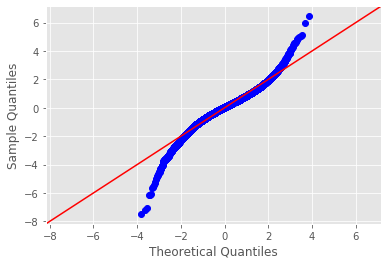

In [52]:
#Residuals remain skewed

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

# Multicolinearity

In [55]:
corr_df = drop_high_p_df.copy()
corr_df = corr_df.corr()

In [57]:
#Checking for multicolinearity

for col in corr_df.columns:
    if len(list(corr_df.index[corr_df[col]>0]))>1:
        print("Column: " + col)
        for x in list(corr_df.index[corr_df[col]>0]):
            if x != col:
                print (x)
        print("")
    else:
        pass

Column: bathrooms
sqft_living
sqft_lot
floors
sqft_above
sqft_basement
long
sqft_living15
sqft_lot15
view_1_0
view_2_0
view_3_0
view_4_0
condition_3
grade_11
grade_8
grade_9
zipcode_98005
zipcode_98006
zipcode_98007
zipcode_98008
zipcode_98011
zipcode_98019
zipcode_98023
zipcode_98027
zipcode_98028
zipcode_98029
zipcode_98030
zipcode_98031
zipcode_98033
zipcode_98034
zipcode_98038
zipcode_98040
zipcode_98042
zipcode_98045
zipcode_98052
zipcode_98053
zipcode_98058
zipcode_98059
zipcode_98065
zipcode_98072
zipcode_98074
zipcode_98075
zipcode_98077
zipcode_98092
zipcode_98102
zipcode_98119
has_basement_1_0
price

Column: sqft_living
bathrooms
sqft_lot
floors
sqft_above
sqft_basement
lat
long
sqft_living15
sqft_lot15
waterfront_1_0
view_1_0
view_2_0
view_3_0
view_4_0
condition_3
grade_11
grade_8
grade_9
zipcode_98004
zipcode_98005
zipcode_98006
zipcode_98007
zipcode_98008
zipcode_98010
zipcode_98011
zipcode_98019
zipcode_98023
zipcode_98027
zipcode_98028
zipcode_98029
zipcode_98033
zipcode


Column: zipcode_98045
bathrooms
sqft_lot
floors
sqft_above
long
sqft_lot15
yrs_since_reno
view_2_0
condition_2
condition_3
grade_5
grade_7
grade_8

Column: zipcode_98052
bathrooms
sqft_living
sqft_lot
floors
sqft_above
lat
long
sqft_living15
sqft_lot15
yrs_since_reno
condition_3
condition_4
grade_11
grade_8
grade_9
price

Column: zipcode_98053
bathrooms
sqft_living
sqft_lot
floors
sqft_above
lat
long
sqft_living15
sqft_lot15
yrs_since_reno
condition_3
grade_8
grade_9
price

Column: zipcode_98055
long
home_age
yrs_since_reno
condition_2
condition_3
grade_4
grade_5
grade_6
grade_7
yr_sold_2015

Column: zipcode_98056
sqft_living
sqft_above
long
yrs_since_reno
view_1_0
view_2_0
condition_4
condition_5
grade_5
grade_9
yr_sold_2015

Column: zipcode_98058
bathrooms
sqft_living
sqft_lot
sqft_above
long
sqft_living15
sqft_lot15
yrs_since_reno
condition_2
condition_4
condition_5
grade_4
grade_8
yr_sold_2015

Column: zipcode_98059
bathrooms
sqft_living
sqft_lot
floors
sqft_above
long
sqft_living